In [5]:
import sys
sys.path.append('../Base/')

from imports import *
from sequential_models import FCQ, Cnn_model
from training_startegy import EGreedyExpStrategy, GreedyStrategy
from env import get_make_env_fn

from Base import ReplayBuffer
from dqn import DQN
from env_image import getImage
from conf import *

#vdisplay = Xvfb(width=1280, height=740, colordepth=16)
#vdisplay.start()

In [6]:
dqn_results = []
log.info(environment_settings)
for seed in SEEDS:

    #Neural Net
    value_model_fn = lambda nS, nA: FCQ(nS, nA, hidden_dims = model_hidden_layers)
    if from_pixel:
        value_model_fn = lambda nS, nA: Cnn_model(nS, nA)

    #Optimizer
    value_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

    #Training Strategy
    training_strategy_fn = lambda: EGreedyExpStrategy(init_epsilon=init_epsilon,  
                                                      min_epsilon=min_epsilon, 
                                                      decay_steps=decay_steps)
    #Testing Strategy
    evaluation_strategy_fn = lambda: GreedyStrategy()

    #Memory
    replay_buffer_fn = lambda: ReplayBuffer(max_size=max_size, batch_size=batch_size)
    
    #Environment
    env_name, gamma, max_minutes, \
    max_episodes, goal_mean_100_reward = environment_settings.values()

    #Agent with all above functions
    agent = DQN(replay_buffer_fn,
                value_model_fn,
                value_optimizer_fn,
                value_optimizer_lr,
                training_strategy_fn,
                evaluation_strategy_fn,
                n_warmup_batches,
                update_target_every_steps)

    make_env_fn, make_env_kargs = get_make_env_fn(env_name=env_name)

    #Taining the agent!!!
    result= agent.train(
        make_env_fn, make_env_kargs, seed, gamma, max_minutes, max_episodes, goal_mean_100_reward, from_pixel, get_image_fn = lambda env: getImage(env))

    dqn_results.append(result)


In [7]:
#agent.checkpoint_dir = '/tmp/tmpb9fxdm67'
#agent.max_episodes = 1000
#vdisplay.stop()


In [8]:
agent.get_cleaned_checkpoints()

{1: '/tmp/tmp2d5l1zpw/model.1.tar',
 4: '/tmp/tmp2d5l1zpw/model.4.tar',
 0: '/tmp/tmp2d5l1zpw/model.0.tar',
 2: '/tmp/tmp2d5l1zpw/model.2.tar',
 3: '/tmp/tmp2d5l1zpw/model.3.tar'}


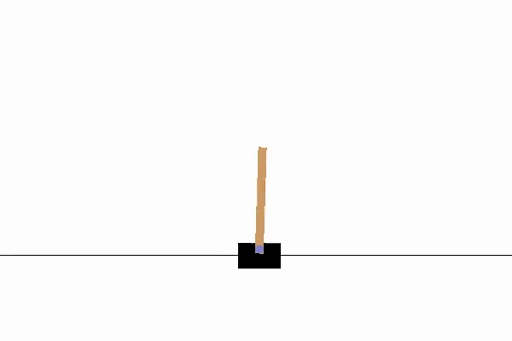
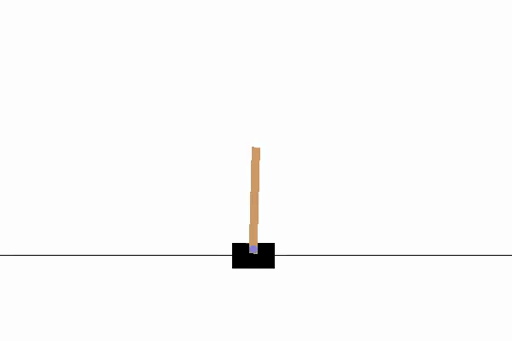
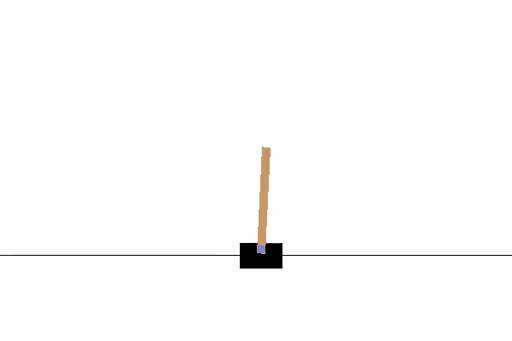
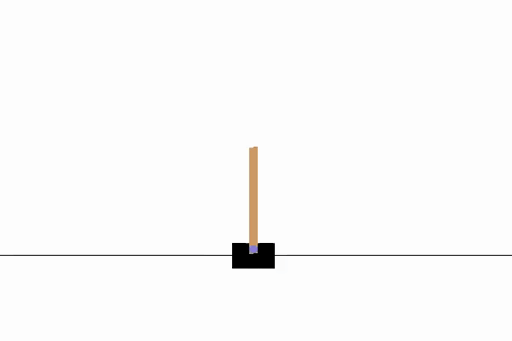
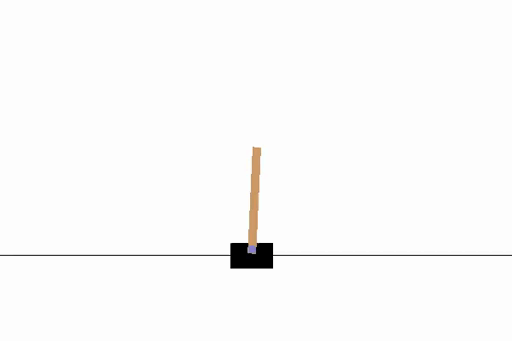

In [9]:
agent.demo_progression()